## MNIST digit recognition: a multiclass classification task

Before getting into building neural networks with PyTorch, let's first try tackling the MNIST digit recognition task with several classification algorithms using scikit-learn:
1. K Nearest Neighbors
2. Random Forest
3. Logistic Regression


In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#### Fetching the MNIST dataset:

In [24]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

#### Examining the data:

The MNIST dataset consists of 70000 images of digits. Each image is 28x28 pixels in size (784 total pixels), with pixel intensity ranging from 0 to 255. The target values are integers from 0 to 9.

In [25]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [26]:
mnist.data

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0          0.0  ...       0.0       0.0       0.0       0.0       0.0   
1          0.0  ...       0.0       0.0       0.0       0.0       0.0   
2          0.0  ...       0.0       0.0       0.0       0.0       0.0   
3          0.0  ...       0.0       0.0       0.0       0.0       0.0   
4          0.0  ...       0.0       0.0       0.0       0.0       0.0   
...        ...  ...       ...       ...       ...       ...       ...   
69995      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69996      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69997      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69998      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69999      0.0  ...       0.0       0.0       0.0       0.0       0.0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0           0.0       0.0       0.0       0.0       0.0  
1           0.0       0.0       0.0       0.0       0.0  
2           0.0       0.0       0.0       0.0       0.0  
3           0.0       0.0       0.0       0.0       0.0  
4           0.0       0.0       0.0       0.0       0.0  
...         ...       ...       ...       ...       ...  
69995       0.0       0.0       0.0       0.0       0.0  
69996       0.0       0.0       0.0       0.0       0.0  
69997       0.0       0.0       0.0       0.0       0.0  
69998       0.0       0.0       0.0       0.0       0.0  
69999       0.0       0.0       0.0       0.0       0.0  

[70000 rows x 784 columns]

In [27]:
X, y = mnist.data, mnist.target
X = X.to_numpy()    # Store X and y data as numpy arrays

In [28]:
X.shape

(70000, 784)

In [29]:
y.shape

(70000,)

#### Display an example image:

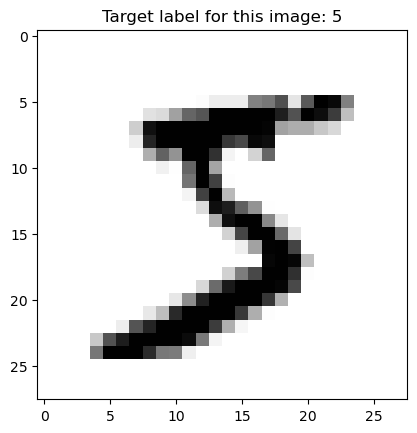

In [30]:
plt.imshow(X[0].reshape(28, 28), cmap="binary")
plt.title(f'Target label for this image: {y[0]}')
plt.show()

#### Let's display some more examples from the MNIST dataset:

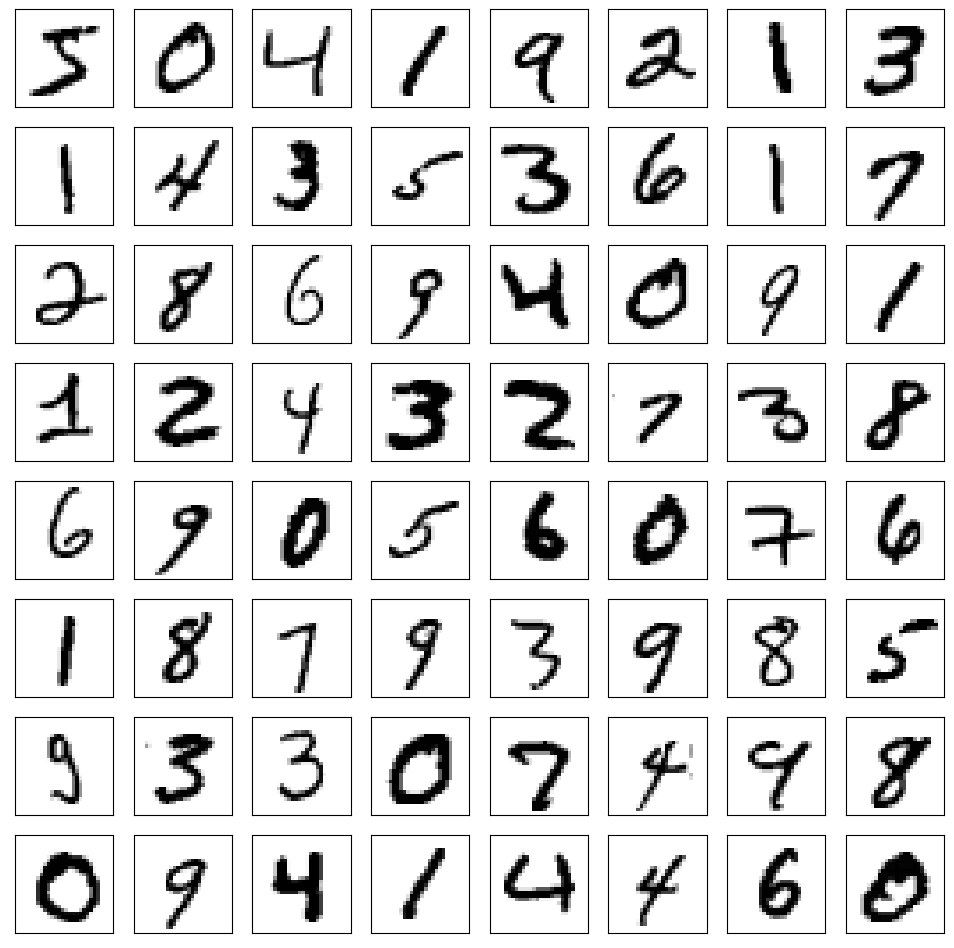

In [31]:
fig, axs = plt.subplots(8, 8, figsize=(12, 12))
index = 0

for i in range(8):
    for j in range(8):

        axs[i, j].imshow(X[index].reshape(28, 28), cmap="binary")
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        index += 1

#### Split into train and test sets:

In [32]:
# 60000 in train set, 10000 in test set:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=1)


# Standardize pixel value to range [0, 1]:

X_train_std = X_train / 255
X_test_std = X_test / 255

In [33]:
X_train_std.shape

(60000, 784)

In [34]:
X_test_std.shape

(10000, 784)

In [35]:
y_train.shape

(60000,)

In [36]:
y_test.shape

(10000,)

## 1. KNN Classifier:

#### Training model:

We can perform 5-fold cross-validation to find the optimal value of hyperparameter k:

In [37]:
knn = GridSearchCV(KNeighborsClassifier(), param_grid={"n_neighbors":list(range(1, 10)), "weights":["uniform", "distance"]}, cv=5, scoring="accuracy", verbose=3)
knn.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.972 total time=   9.0s
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.971 total time=   8.7s
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.971 total time=   9.9s
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.973 total time=   9.5s
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.973 total time=   8.8s
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.972 total time=   8.6s
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.971 total time=   8.9s
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.971 total time=   9.4s
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.973 total time=   9.2s
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.973 total time=  11.7s
[CV 1/5] END ....n_neighbors=2, weights=uniform;, score=0.965 total time=  10.9s
[CV 2/5] END ....n_neighbors=2, weights=uniform;

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [38]:
print("KNN best parameters: ")
print(knn.best_params_)

KNN best parameters: 
{'n_neighbors': 4, 'weights': 'distance'}


In [39]:
best_knn = KNeighborsClassifier(n_neighbors=4, weights='distance')
best_knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

#### Evaluate model on test set:

In [40]:
y_pred_best_knn = best_knn.predict(X_test_std)
best_knn_accuracy = best_knn.score(X_test_std, y_test)
print(best_knn_accuracy)

0.9748


We see that the KNN classifier achieves an accuracy of <b>97.48%</b> on the test dataset.

#### Classification report and confusion matrix:





Classification Report for KNN classifier: 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       959
           1       0.97      1.00      0.98      1186
           2       0.99      0.97      0.98      1035
           3       0.98      0.96      0.97      1031
           4       0.98      0.97      0.97       941
           5       0.97      0.97      0.97       930
           6       0.98      0.99      0.99       942
           7       0.96      0.98      0.97      1050
           8       0.99      0.95      0.97       936
           9       0.95      0.97      0.96       990

    accuracy                           0.97     10000
   macro avg       0.98      0.97      0.97     10000
weighted avg       0.98      0.97      0.97     10000




Confusion Matrix for KNN classifier: 



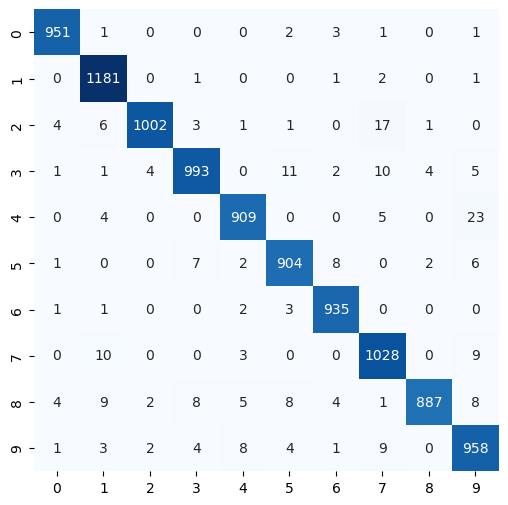

In [41]:
print('\n\n\n')
print('Classification Report for KNN classifier: \n')
print(classification_report(y_test, y_pred_best_knn))
print('\n\n')
print('Confusion Matrix for KNN classifier: \n')
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred_best_knn), annot=True, fmt='g', cmap='Blues', cbar=False)
plt.show()

#### Misclassification analysis:

Let's take a look at some of the misclassified samples along with their true label:

In [42]:
correct_pred = np.asarray(y_test == y_pred_best_knn)
misclassified = np.where(correct_pred == False)[0]

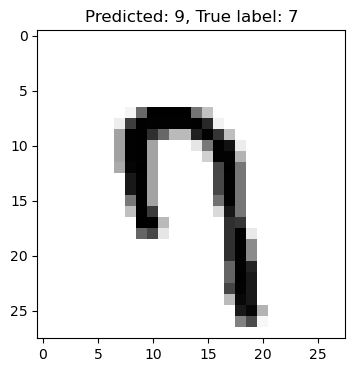

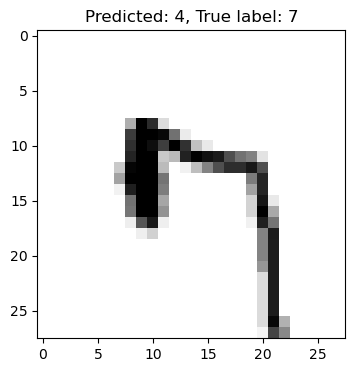

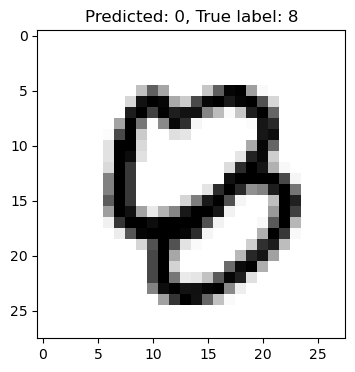

In [43]:
for i in range(3):
    image_idx = misclassified[i]
    plt.figure(figsize=(4,4))
    plt.imshow(X_test[image_idx].reshape(28, 28), cmap="binary")
    plt.title('Predicted: ' + str(y_pred_best_knn[image_idx]) + ', True label: ' + str(np.asarray(y_test)[image_idx]))
    plt.show()


## 2. Random Forest Classifier

#### Training model:

We can perform 5-fold cross-validation to find the optimal value of hyperparameter n_estimators:

In [44]:
rfc = GridSearchCV(RandomForestClassifier(), param_grid={"n_estimators":[10, 50, 100]}, cv=5, scoring="accuracy")
rfc.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 50, 100]}, scoring='accuracy')

In [45]:
print("RFC best parameters: ")
print(rfc.best_params_)

RFC best parameters: 
{'n_estimators': 100}


In [46]:
best_rfc = RandomForestClassifier(n_estimators=100)
best_rfc.fit(X_train_std, y_train)

RandomForestClassifier()

#### Evaluate model on test set:

In [47]:
y_pred_best_rfc = best_rfc.predict(X_test_std)
best_rfc_accuracy = best_rfc.score(X_test_std, y_test)
print(best_rfc_accuracy)

0.9693


Our random forest classifier achieves an accuracy of <b>96.93%</b> on the test dataset.

#### Classification report and confusion matrix:





Classification Report for Random Forest classifier: 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       959
           1       0.98      0.99      0.98      1186
           2       0.97      0.97      0.97      1035
           3       0.97      0.94      0.96      1031
           4       0.97      0.97      0.97       941
           5       0.97      0.97      0.97       930
           6       0.97      0.99      0.98       942
           7       0.96      0.98      0.97      1050
           8       0.97      0.95      0.96       936
           9       0.94      0.95      0.95       990

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000




Confusion Matrix for Random Forest classifier: 



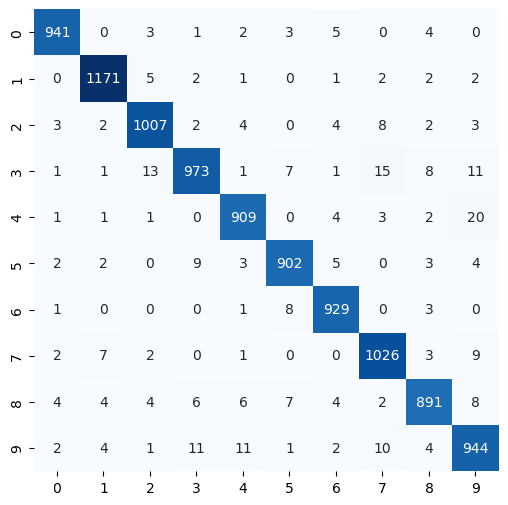

In [48]:
print('\n\n\n')
print('Classification Report for Random Forest classifier: \n')
print(classification_report(y_test, y_pred_best_rfc))
print('\n\n')
print('Confusion Matrix for Random Forest classifier: \n')
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred_best_rfc), annot=True, fmt='g', cmap='Blues', cbar=False)
plt.show()

## 3. Logistic Regression:

#### Training model:

In [49]:
lr = LogisticRegression(multi_class="multinomial", solver='lbfgs', max_iter=3000)
lr.fit(X_train_std, y_train)

LogisticRegression(max_iter=3000, multi_class='multinomial')

#### Evaluate model on test set:

In [50]:
y_pred_lr = lr.predict(X_test_std)
lr_accuracy = lr.score(X_test_std, y_test)
print(lr_accuracy)

0.918


Logistic regression achieves an accuracy of <b>91.8%</b> on the test dataset. We see that both random forest and KNN classifiers perform better for this task.

#### Classification report and confusion matrix:





Classification Report for logistic regression: 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       959
           1       0.96      0.98      0.97      1186
           2       0.93      0.90      0.91      1035
           3       0.90      0.89      0.89      1031
           4       0.91      0.91      0.91       941
           5       0.89      0.87      0.88       930
           6       0.94      0.95      0.94       942
           7       0.93      0.93      0.93      1050
           8       0.88      0.87      0.87       936
           9       0.88      0.91      0.89       990

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000




Confusion Matrix for logistic regrssion: 



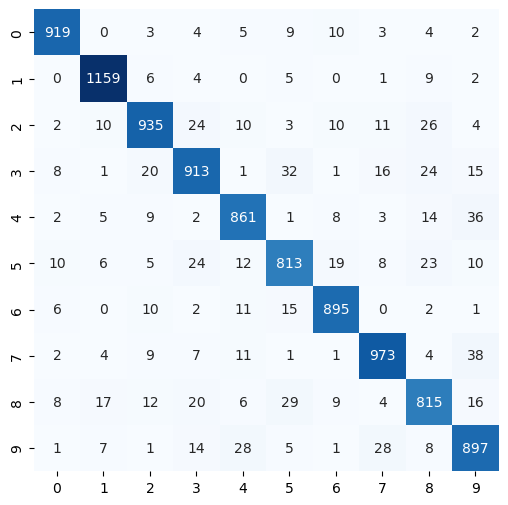

In [51]:
print('\n\n\n')
print('Classification Report for logistic regression: \n')
print(classification_report(y_test, y_pred_lr))
print('\n\n')
print('Confusion Matrix for logistic regrssion: \n')
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='g', cmap='Blues', cbar=False)
plt.show()

## 4. XGBoost Classifier

In [ ]:
xgb_params = {"learning_rate":[0.3, 0.1, 0.01], 
              "max_depth":[2, 4, 6, 8],
              "min_child_weight":[1, 2, 4, 8]}


xgb = GridSearchCV(XGBClassifier(enable_categorical=True), param_grid=xgb_params, cv=5, scoring="accuracy", verbose=5)
xgb.fit(X_train_std, y_train.astype(int))